In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import glob
import cv2
import numpy as np

In [3]:
images = [cv2.imread(path)[..., ::-1] for path in sorted(glob.glob("camera_cal/*"))]

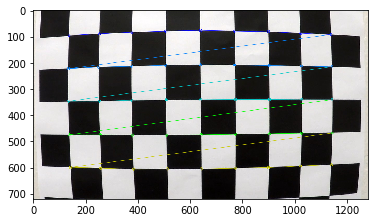

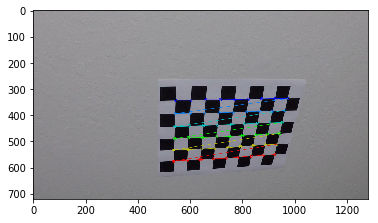

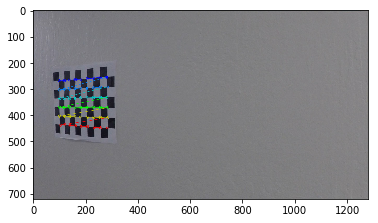

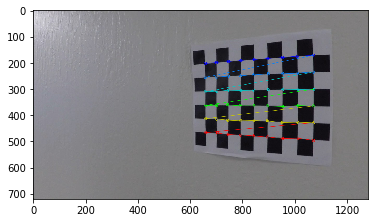

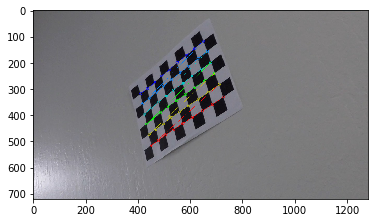

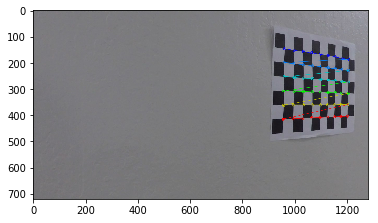

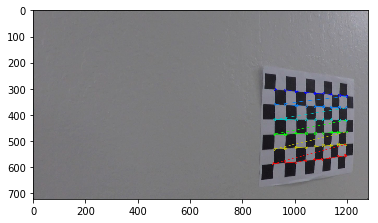

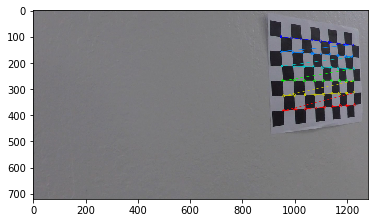

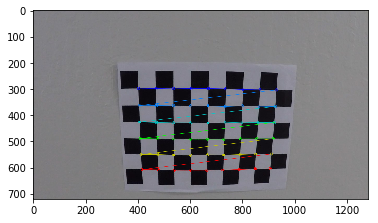

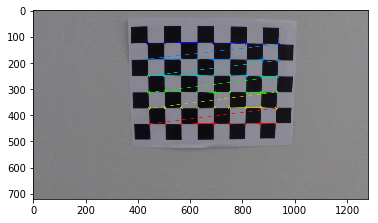

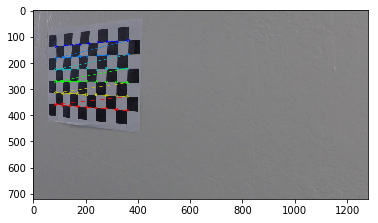

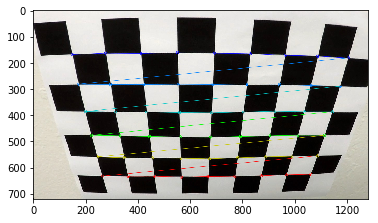

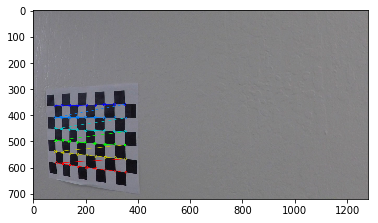

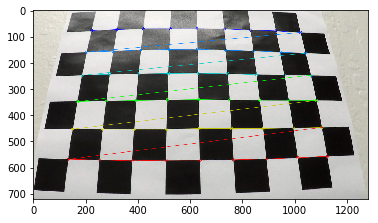

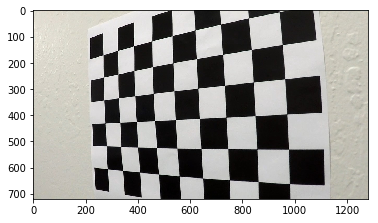

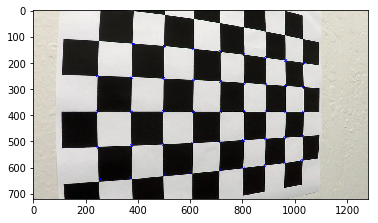

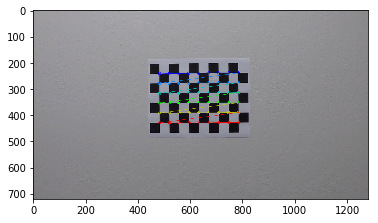

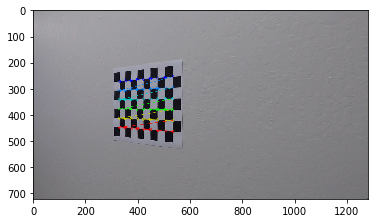

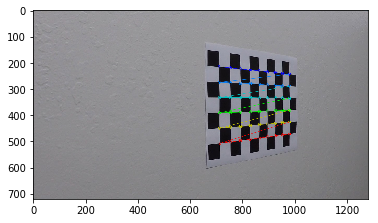

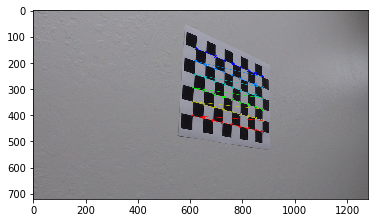

In [4]:
board_sizes = [(9, 5)] + [(9, 6)] * 13 + [(8, 6)] + [(9, 5)] + [(9, 6)] * 4

imgpoints = []
objpoints = []

for idx, img in enumerate(images):
    img = img.copy()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    board_size = board_sizes[idx]
    ret, corners = cv2.findChessboardCorners(gray, board_size, None)
    img = cv2.drawChessboardCorners(img, board_size, corners, ret)

    if ret:
        objp = np.zeros((board_size[0] * board_size[1], 3), np.float32)
        objp[:, :2] = np.mgrid[0:board_size[0], 0:board_size[1]].T.reshape(-1, 2)
        
        imgpoints.append(corners)
        objpoints.append(objp)
    
    plt.figure()
    plt.imshow(img)
    
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)    
    

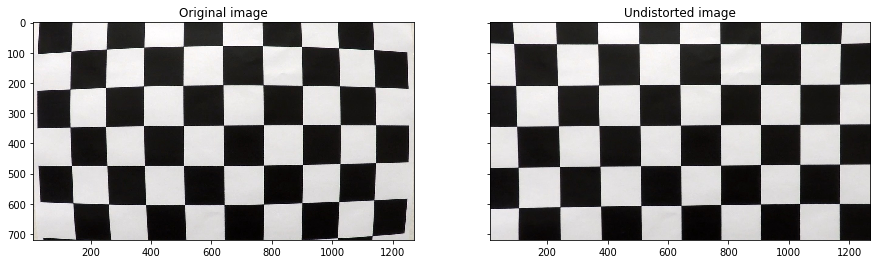

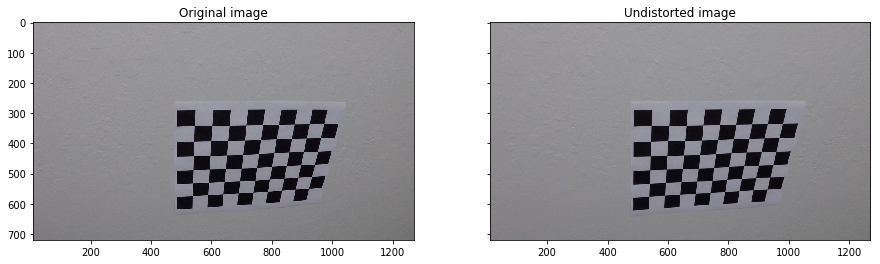

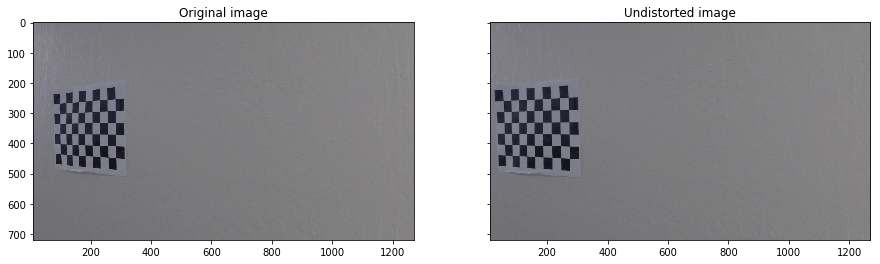

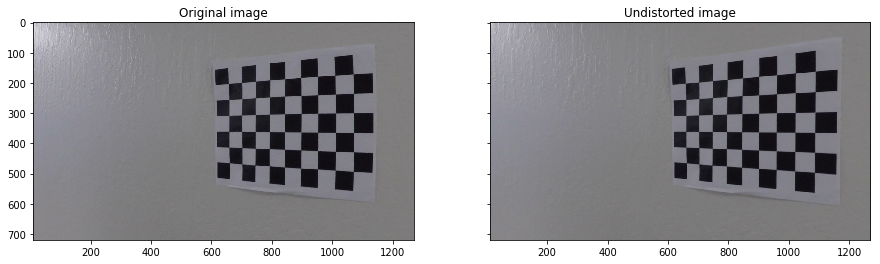

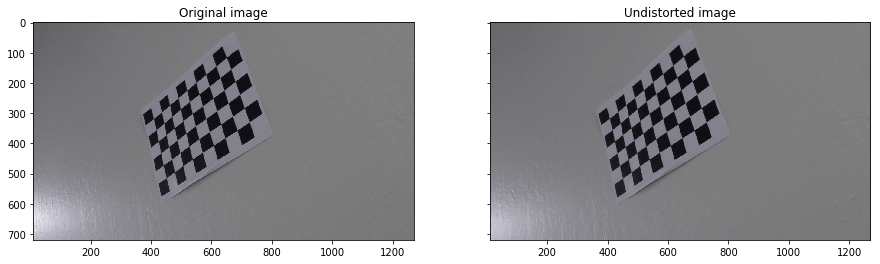

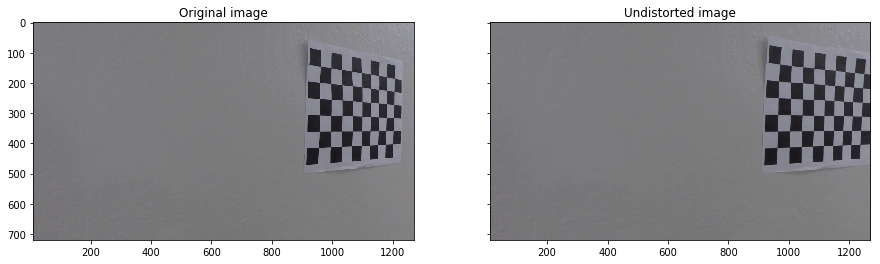

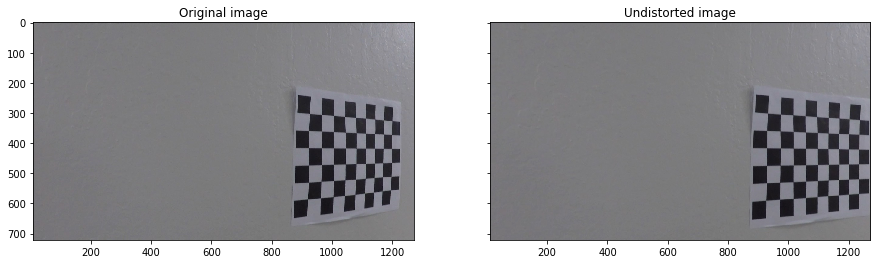

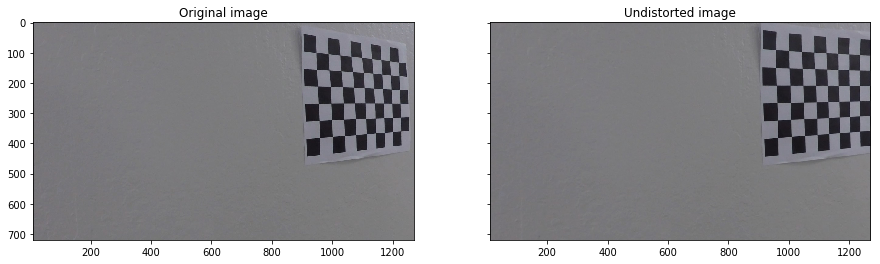

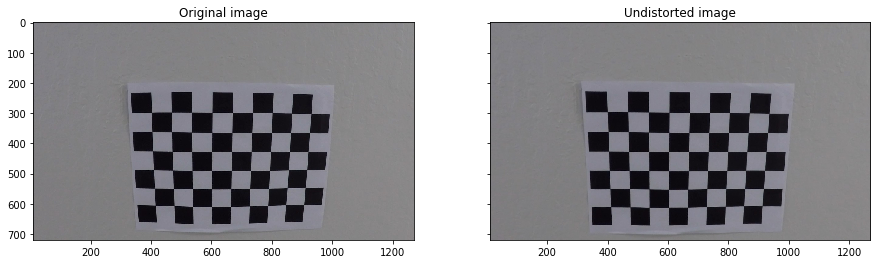

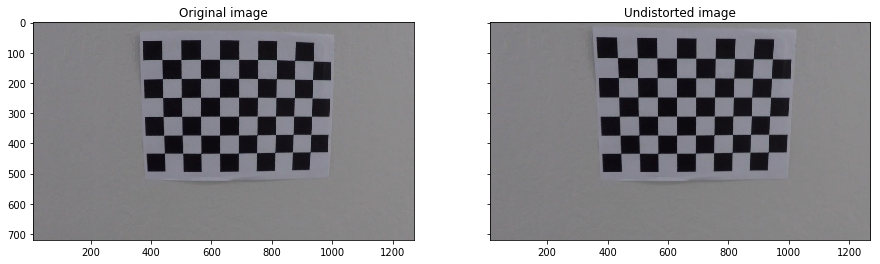

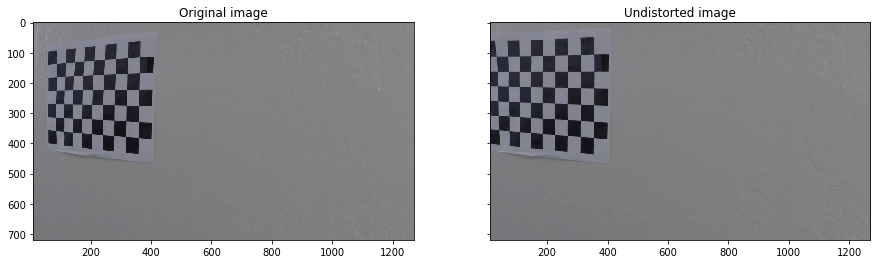

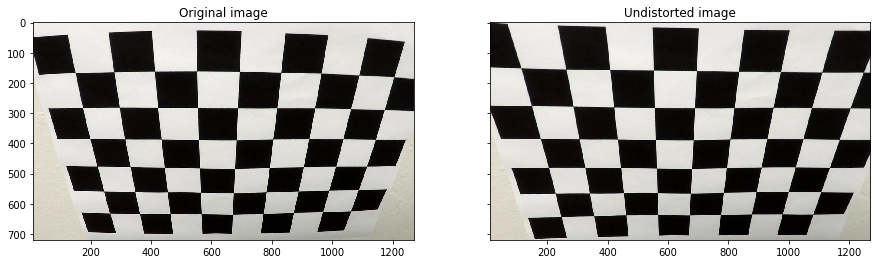

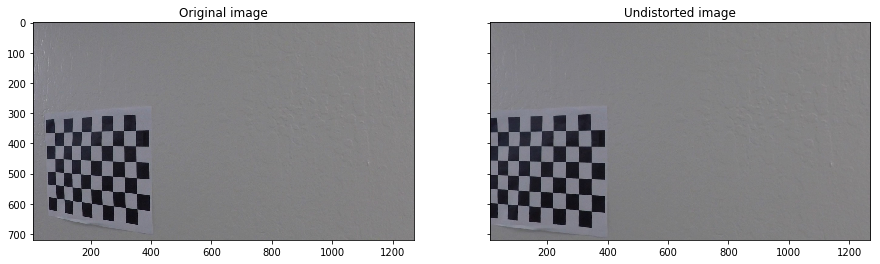

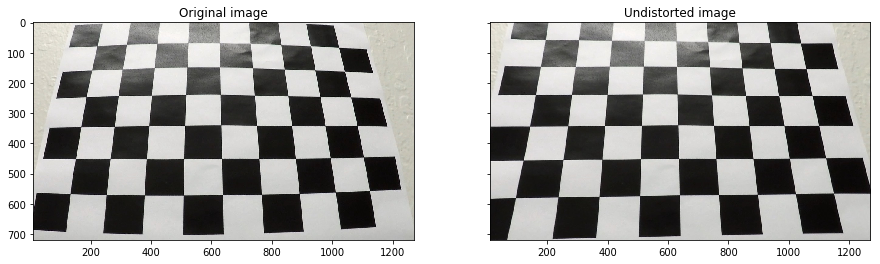

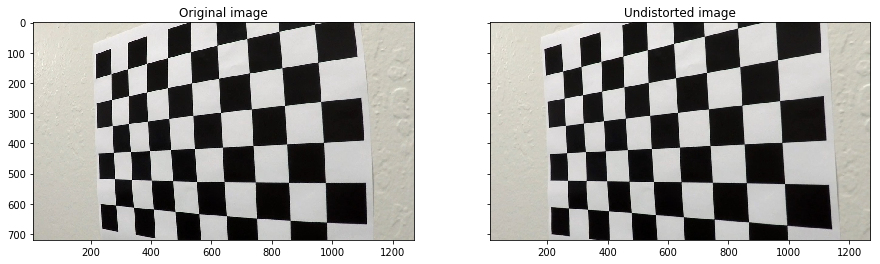

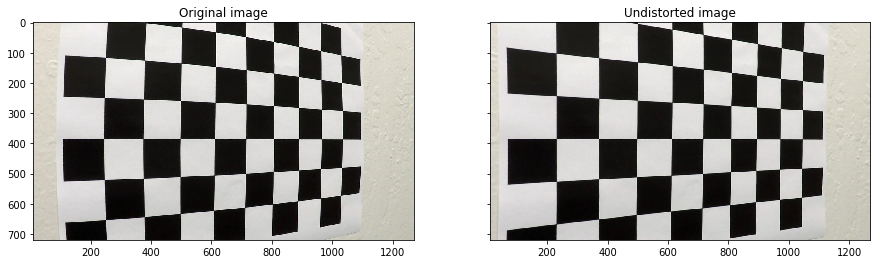

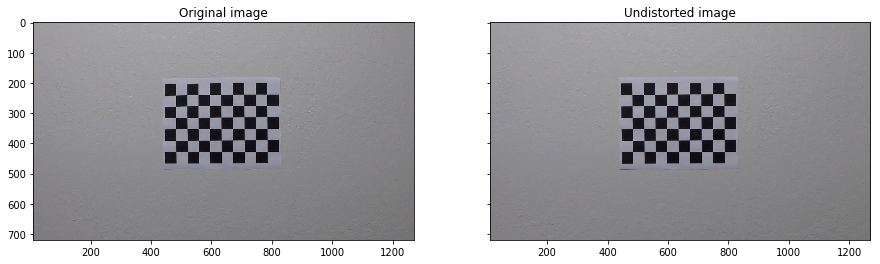

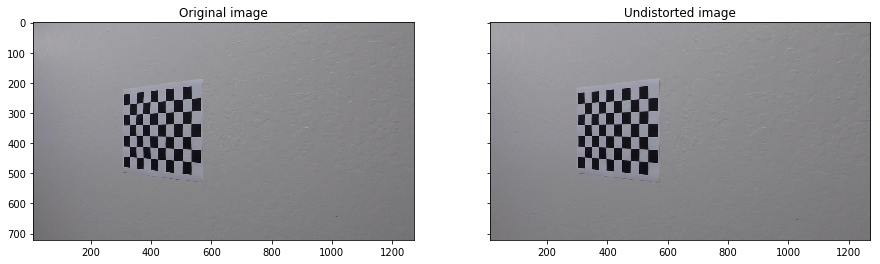

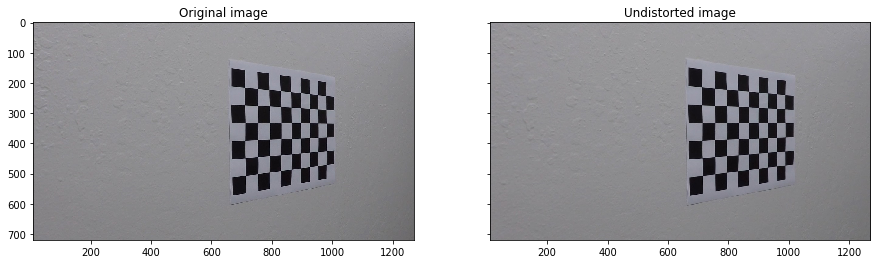

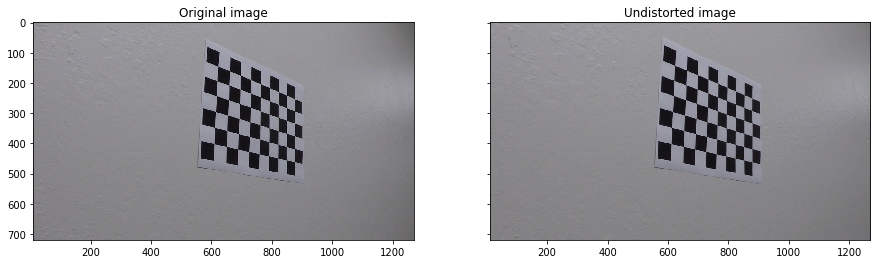

In [5]:
for idx, img in enumerate(images):
    img = img.copy()

    board_size = board_sizes[idx]
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
    ax1.imshow(img)
    ax1.set_title("Original image")
    ax2.imshow(dst)
    ax2.set_title("Undistorted image")
    

In [6]:
import pickle

with open("cameraMatrix.pkl", "wb") as mtxFile, open("distMatrix.pkl", "wb") as distFile:
    pickle.dump(mtx, mtxFile, -1)
    pickle.dump(dist, distFile, -1)
